In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance, anova_lm
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
df= pd.read_csv('SalaryData.csv')

In [ ]:
# Is there a dependence of Salary with respect to Education - Solve using ANOVA
#H0 - The mean of Salary is same for all 3 levels of Treatment (Education)
#H1 - For atleast one level of education, the mean of Salary is different

In [38]:
df.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [7]:
df['Occupation'] = pd.Categorical(df['Occupation'])
df['Education'] = pd.Categorical(df['Education'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Education   40 non-null     category
 1   Occupation  40 non-null     category
 2   Salary      40 non-null     int64   
dtypes: category(2), int64(1)
memory usage: 824.0 bytes


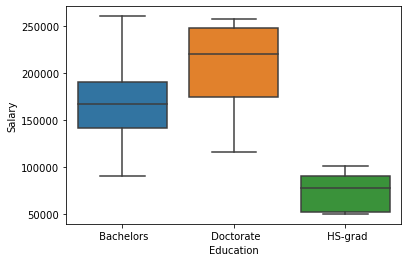

In [12]:
sns.boxplot(df.Education, df.Salary)

In [14]:
display(df.groupby("Education").mean())
display(df.groupby("Education").std())

,Salary
Education,
Bachelors,165152.933333
Doctorate,208427.000000
HS-grad,75038.777778


,Salary
Education,
Bachelors,46596.777211
Doctorate,43070.549855
HS-grad,19839.481632


In [9]:
formula = "Salary ~ C(Education)"
model = ols(formula,df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,30.95628,1.257709e-08
Residual,37.0,6.137256e+10,1.658718e+09,NaN,NaN


In [ ]:
# Is there a dependence of Salary with respect to Occupation - Solve using ANOVA
#H0 - The mean of Salary is same for all 3 levels of Treatment (Occupation)
#H1 - For atleast one level of occupation, the mean of Salary is different

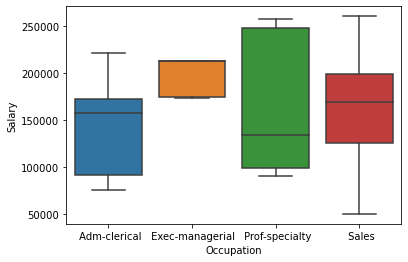

In [11]:
sns.boxplot(df.Occupation, df.Salary)

In [15]:
display(df.groupby("Occupation").mean())
display(df.groupby("Occupation").std())

,Salary
Occupation,
Adm-clerical,141424.300000
Exec-managerial,197117.600000
Prof-specialty,168953.153846
Sales,157604.416667


,Salary
Occupation,
Adm-clerical,50713.167251
Exec-managerial,21287.039703
Prof-specialty,76815.328725
Sales,72012.073563


In [22]:
formula = "Salary ~ C(Occupation)"
model = ols(formula,df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Occupation),3.0,1.125878e+10,3.752928e+09,0.884144,0.458508
Residual,36.0,1.528092e+11,4.244701e+09,NaN,NaN


In [25]:
formula = "Salary ~ C(Occupation) + C(Education)"
model = ols(formula,df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Occupation),3.0,1.125878e+10,3.752928e+09,2.284576,9.648715e-02
C(Education),2.0,9.695663e+10,4.847831e+10,29.510933,3.708479e-08
Residual,34.0,5.585261e+10,1.642724e+09,NaN,NaN


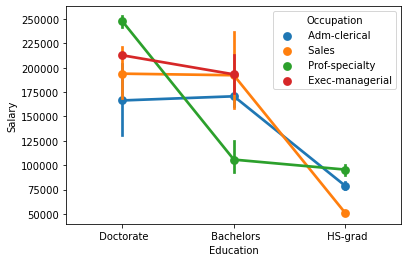

In [26]:
sns.pointplot(x="Education", y="Salary", data=df, hue ="Occupation")

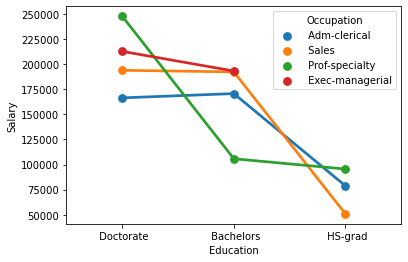

In [28]:
sns.pointplot(x="Education", y="Salary", data=df, hue ="Occupation", ci=None)

In [41]:
#sns.pointplot(x="Occupation", y="Salary", data=df, hue ="Education", ci=None)

In [40]:
formula = "Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)"
model = ols(formula,df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,72.211958,5.466264e-12
C(Occupation),3.0,5.519946e+09,1.839982e+09,2.587626,7.211580e-02
C(Education):C(Occupation),6.0,3.634909e+10,6.058182e+09,8.519815,2.232500e-05
Residual,29.0,2.062102e+10,7.110697e+08,NaN,NaN


In [42]:
formula = "Salary ~ C(Occupation) + C(Education) + C(Occupation):C(Education)"
model = ols(formula,df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Occupation),3.0,1.125878e+10,3.752928e+09,5.277862,4.993238e-03
C(Education),2.0,9.695663e+10,4.847831e+10,68.176603,1.090908e-11
C(Occupation):C(Education),6.0,3.523330e+10,5.872217e+09,8.258287,2.913740e-05
Residual,29.0,2.062102e+10,7.110697e+08,NaN,NaN
